In [1]:
#Monte Carlo Simulation is a statistical method applied in financial modeling. ... 
#The simulation relies on the repetition of random samples to achieve numerical results. 
#It can be used to understand the effect of uncertainty and randomness in forecasting models.

#Monte Carlo simulation is a technique used to understand the impact of risk and uncertainty in financial, project management, 
#cost, and other forecasting models. A Monte Carlo simulator helps one visualize most or all of the potential outcomes 
#to have a better idea regarding the risk of a decision

#Monte Carlo Simulation is a statistical method applied in financial modeling where the probability of different outcomes 
#in a problem cannot be simply solved, due to the interference of a random variable. The simulation relies on the repetition of random samples 
#to achieve numerical results. It can be used to understand the effect of uncertainty and randomness in forecasting models.

#Monto Carlo simulation is commonly used in equity options pricing. The prices of an underlying share are simulated for each possible price path 
#and the option payoffs are determined for each path. The payoffs are then averaged and discounted to today, which provides the current value 
#of an option. 

### 1_Predict the firm's future gross profit:

Imagine you are an experienced manager and you have forecasted revenues of 170mln, with an expected deviation of $20mln. You are convinced Cogs will be near 60% of the revenues, and their expected deviation is 10% of its own value.
NumPy’s random.normal function to simulate the potential revenue stream for 1000 iterations

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

rev_m = 170 #revenue mean
rev_stdev = 20
iterations = 1000

In [3]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([185.8259621 , 159.42469142, 166.63806735, 148.21890983,
       184.78416194, 166.32443366, 190.29246492, 164.80853233,
       170.97578678, 188.03430476, 161.73899178, 190.03420787,
       158.26488266, 134.84449453, 171.18912148, 168.98884329,
       168.20387128, 178.00500802, 169.72906942, 149.43550133,
       202.93811477, 206.00115446, 159.77439007, 168.70562042,
       165.47465484, 139.93025907, 161.73542293, 157.65479462,
       129.07859432, 162.36110633, 182.32478744, 143.7685722 ,
       172.89591358, 154.684941  , 153.91890163, 167.38580105,
       155.58531345, 174.42366448, 204.45747183, 157.34146185,
       162.38349742, 174.98282433, 146.57992013, 177.57590888,
       175.11039739, 167.31175873, 177.57531415, 172.41476592,
       155.2669373 , 189.99651301, 226.22190812, 183.15788054,
       173.10921682, 161.80612835, 163.15238408, 138.49452438,
       181.26976454, 158.88699019, 169.6438595 , 176.86724719,
       191.7143401 , 174.8811527 , 193.54697368, 182.18

Plot the obtained data for revenues and Cogs on a graph and observe the behavior of the obtained values

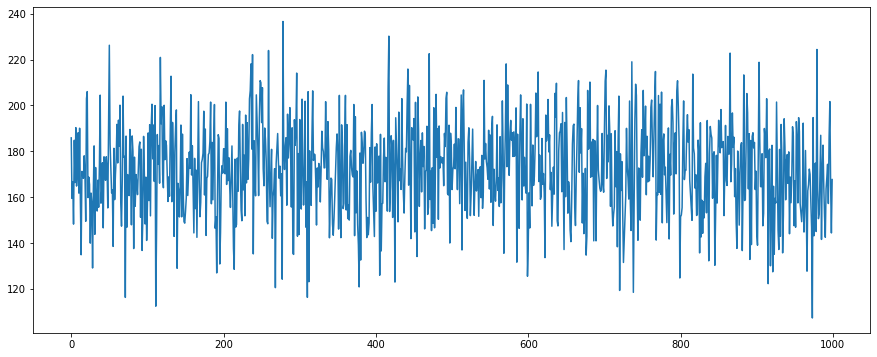

In [4]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

In [5]:
#cost of good sold ~60% of revenues

COGS = - (rev * np.random.normal(0.6, 0.1))  #money spent so '-'sign

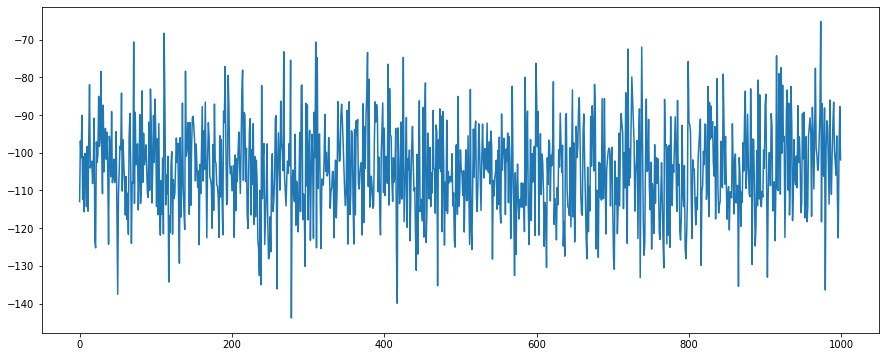

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(COGS)
plt.show()

In [7]:
COGS.mean()

-104.52711723206976

In [8]:
COGS.std()

12.346217517131533

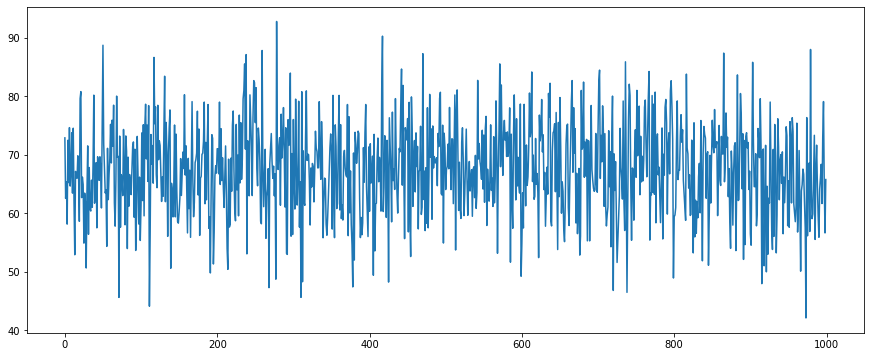

In [9]:
#estimate the expected Gross Profit of your company

Gross_Profit = rev + COGS
Gross_Profit


plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [10]:
max(Gross_Profit)

92.79064623379864

In [11]:
min(Gross_Profit)

42.076127971023894

In [12]:
Gross_Profit.mean()

67.45030089114816

In [13]:
Gross_Profit.std()

7.966890396003286

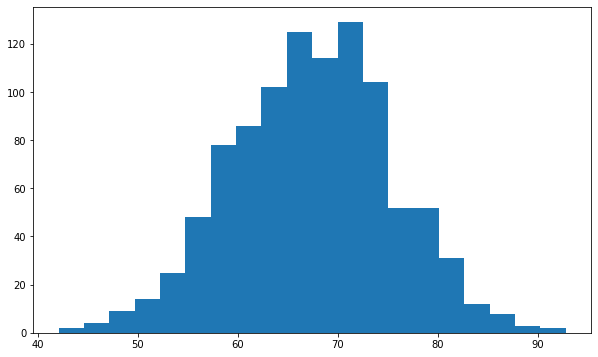

In [14]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

### 2_Forecasting Stock Prices

In [15]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plot
from scipy.stats import norm 
%matplotlib inline

In [16]:
tickers = 'PG'
data = pd.DataFrame()
data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = '2010-1-1')['Adj Close']

log_returns = np.log(data / data.shift(1))#or 
#log_returns = np.log(1 + data.pct_change())
log_returns.head()

,PG
Date,
2010-01-04,NaN
2010-01-05,0.000327
2010-01-06,-0.004755
2010-01-07,-0.005438
2010-01-08,-0.001323


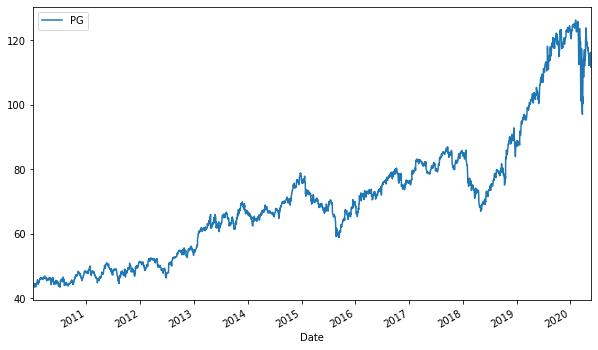

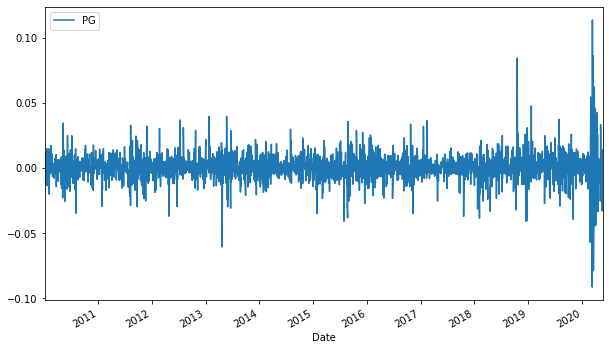

In [17]:
data.plot(figsize=(10, 6));
log_returns.plot(figsize=(10, 6))

In [18]:
u = log_returns.mean()
u

PG    0.000359
dtype: float64

In [19]:
var = log_returns.var()
var

PG    0.000118
dtype: float64

$$
drift = u - \frac{1}{2} \cdot var
$$

In [20]:
#Calculate the drift:
    
drift = u - (0.5 * var)
drift

PG    0.0003
dtype: float64

In [21]:
stdev = log_returns.std()
stdev

PG    0.010862
dtype: float64

#### Forecasting Future Stock Prices – continued:

In [22]:
type(drift)

pandas.core.series.Series

In [23]:
type(stdev)

pandas.core.series.Series

In [24]:
np.array(drift)#or 


array([0.00029996])

In [25]:
#Use “.values” to transform the drift and the stdev objects into arrays.

#drift.values
stdev.values

array([0.0108623])

In [26]:
norm.ppf(0.95)# if an event has a chance of 95% of accurate the distance between this event and the mean will be appr. 1.65 standard deviation

1.6448536269514722

In [27]:
x = np.random.rand(10, 2) #ten 2 dem. matrix between 0 and 1
x

array([[0.53822764, 0.30014641],
       [0.25997858, 0.02060201],
       [0.57350963, 0.07111125],
       [0.64234468, 0.95980463],
       [0.05336551, 0.41681359],
       [0.53683426, 0.38549944],
       [0.51988418, 0.34538958],
       [0.57999645, 0.39062157],
       [0.25213114, 0.93372816],
       [0.67674318, 0.95841375]])

In [28]:
norm.ppf(x)#the first number from the first row corresponds to the forest probability in the previous array (the x matrix) and so on

array([[ 0.09596959, -0.52397948],
       [-0.64341144, -2.04147112],
       [ 0.18531658, -1.46756469],
       [ 0.36473311,  1.74842344],
       [-1.61306212, -0.21005189],
       [ 0.09246137, -0.29106856],
       [ 0.0498629 , -0.3977979 ],
       [ 0.20188439, -0.27769938],
       [-0.66779841,  1.50414638],
       [ 0.45861086,  1.73256793]])

In [29]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.47856965,  0.11329897],
       [ 1.42411897,  0.17471457],
       [-0.74798329,  1.72669702],
       [ 1.87941588, -0.44633714],
       [ 0.57645583,  0.98198434],
       [ 0.18984995,  0.39433708],
       [ 0.4223053 ,  0.60977357],
       [-0.06432474,  0.69379078],
       [ 0.33954971,  1.80230987],
       [-0.33811794,  1.53569021]])

In [30]:
t_intervals = 1000
iterations = 10

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [31]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [32]:
daily_returns

array([[0.9931123 , 1.01769157, 1.00921526, ..., 1.00533493, 1.01637809,
        0.99995409],
       [1.01123889, 0.97204951, 1.00933152, ..., 1.00879133, 0.97734386,
        1.00496482],
       [0.99096551, 0.99822082, 0.98390015, ..., 1.0036057 , 0.99604212,
        1.005496  ],
       ...,
       [0.99625409, 1.00729115, 1.00899521, ..., 1.00141258, 1.01089213,
        1.00902057],
       [0.99516966, 0.99320152, 1.00506385, ..., 1.0250452 , 1.0049051 ,
        0.98286168],
       [1.00277224, 1.00719703, 1.01018179, ..., 1.01241416, 0.99460665,
        0.99655202]])

Forecast future stock prices for every trading day a year ahead. So, assign 250 to “t_intervals”.
Let’s examine 10 possible outcomes. Bind “iterations” to the value of 10.#ten series of future stock price predictions...

In [33]:
t_intervals = 250
iterations = 10

$$
daily\_returns = exp({drift} + {stdev} * z), 
$$ 
<br \>
$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

In [34]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.01157468, 1.0110312 , 1.02133791, ..., 1.00898329, 0.98630257,
        0.98801855],
       [1.00165879, 1.02976904, 1.02161836, ..., 0.98801915, 0.99988888,
        0.99752277],
       [0.9967214 , 0.99271896, 0.95806173, ..., 1.01861482, 0.98560378,
        0.98654744],
       ...,
       [0.99258946, 1.00334839, 0.99688637, ..., 0.99312373, 1.0011436 ,
        0.99121267],
       [0.99946807, 1.00730882, 0.99905217, ..., 0.99269739, 1.00308547,
        0.98993694],
       [1.01551609, 1.02144009, 0.99909589, ..., 0.99014599, 0.98751428,
        1.01118667]])

### Create a variable S0 equal to the last adjusted closing price of PG. Use the “iloc” method.

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  


$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [35]:
S0 = data.iloc[-1] #the last stock price in our data (the stock price today)
S0


PG    112.599998
Name: 2020-05-22 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix.

In [36]:
# a function to create an empty list as big as some other existing list

price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
#fill out the empty list

price_list[0] = S0
price_list

array([[112.59999847, 112.59999847, 112.59999847, ..., 112.59999847,
        112.59999847, 112.59999847],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [39]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [40]:
price_list

array([[112.59999847, 112.59999847, 112.59999847, ..., 112.59999847,
        112.59999847, 112.59999847],
       [112.78677838, 115.95199289, 115.03422614, ..., 111.25095488,
        112.58748661, 112.32106284],
       [112.41699568, 115.10774169, 110.20988936, ..., 113.32187133,
        110.96665206, 110.81005746],
       ...,
       [148.68905295, 144.64882248, 130.77281705, ..., 131.56175162,
        124.45819693, 127.3770959 ],
       [148.60996009, 145.70603412, 130.64886675, ..., 130.60100722,
        124.84220923, 126.09529219],
       [150.91580578, 148.82998528, 130.5307454 , ..., 129.31406344,
        123.28346462, 127.50587852]])

Finally, plot the obtained price list data.

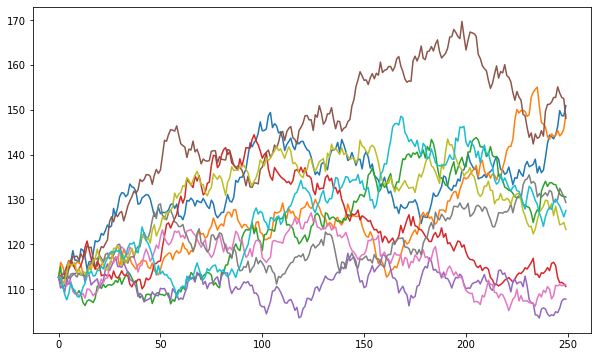

In [41]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

## Monte Carlo - Black-Scholes-Merton for option pricing

It calculates the value of a call by option taking the difference between the amount you get if you exercise the option minus the amount you have to pay if you exercise the option

#### Calculate the price of a call option using Black-Scholes Formula:
    

In [43]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm

$$
d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{stdev^2}{2})t}{s \cdot \sqrt{t}}
$$

$$
d_2 = d_1 - s \cdot \sqrt{t} = \frac{\ln(\frac{S}{K}) + (r - \frac{stdev^2}{2})t}{s \cdot \sqrt{t}}
$$
<br />
S: current stock price

K: strike price

t: time until option expires

r: risk free interest rate

s: sample std

N: standard normal distribution

e: exponential term

C: call premium
<br />

In [44]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [45]:
norm.cdf(0)#cumulative normal distribution (Cumulative Distribution Function) 

0.5

In [50]:
# hear zero is the standard mean of the normal distribution
#due to result half of the data lies below 0 in the normal distribution curve

In [47]:
norm.cdf(0.25)

0.5987063256829237

In [48]:
norm.cdf(0.75)

0.7733726476231317

In [49]:
norm.cdf(9)

1.0

the Black Scholes Function:
$$
\textbf{C} = SN(d_1) - Ke^{-rt}N(d_2) 
$$

In [54]:
def BSM(S, K, r, stdev, T):
        return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [55]:
ticker = 'PG'  
data = pd.DataFrame()  
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [63]:
#Create a variable S equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [56]:
S = data.iloc[-1]
S

PG    82.690414
Name: 2017-03-21 00:00:00, dtype: float64

In [57]:
log_returns = np.log(1 + data.pct_change())

In [58]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [59]:
#Set the risk free rate, r, equal to 2.5% (0.025); the strike price, K, equal to 110.0; and 
#the time horizon, T, equal to 1, respectively.

r = 0.025
K = 110.0
T = 1 #one year

In [60]:
d1(S, K, r, stdev, T)

PG   -1.386525
dtype: float64

In [61]:
d2(S, K, r, stdev, T)

PG   -1.563076
dtype: float64

In [ ]:
#Use the BSM function to estimate the price of a call option, given you know the values of S, K, r, stdev, and T.

In [62]:
BSM(S, K, r, stdev, T)

PG    0.514584
Name: 2017-03-21 00:00:00, dtype: float64

## calculate the option price in more sophisticated way (Euler Discretization)

In [64]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [65]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [66]:
log_returns = np.log(1 + data.pct_change())

In [67]:
#Set the risk free rate, r, equal to 2.5% (0.025):

r = 0.025

In [68]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [69]:
type(stdev)

pandas.core.series.Series

In [70]:
#transform the object into an array, reassign stdev.values to stdev

stdev = stdev.values
stdev

array([0.17655018])

In [71]:
#Set the time horizon, T, equal to 1 year, the number of time intervals equal to 250, the iterations equal to 10,000. 
#Create a variable, delta_t, equal to the quotient of T divided by the number of time intervals

T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [72]:
#Let Z equal a random matrix with dimension (time intervals + 1) by the number of iterations.
#Use the .zeros_like() method to create another variable, S, with the same dimension as Z. S is the matrix 
#to be filled with future stock price data
#Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method

Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

Use the following formula to create a loop within the range (1, t_intervals + 1) that reassigns values to S in time t

$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^{0.5} \cdot Z_t)
$$

In [73]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [74]:
S.shape

(251, 10000)

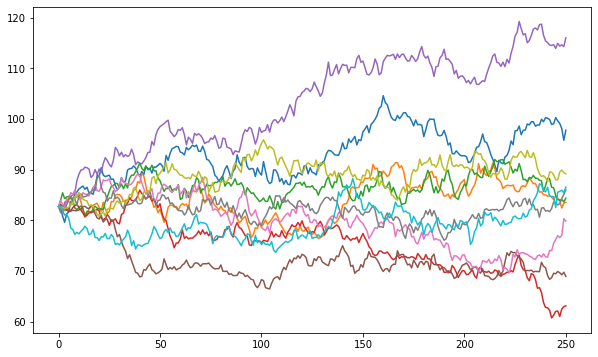

In [75]:
#Plot the first 10 of the 10,000 generated iterations on a graph

plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [76]:
#Use numpy.maximum to create a vector with as many elements as there are columns in the S matrix

p = np.maximum(S[-1] - 110, 0) #it creates an array that contains either 0s or the numbers equal to the differences
p

array([0., 0., 0., ..., 0., 0., 0.])

In [77]:
p.shape

(10000,)

Use the following formula to forecast the price of a stock option

$$
C = \frac{exp(-r \cdot T) \cdot \sum{p_i}}{iterations}
$$

In [ ]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  
#Because this pricing model is based on random iterations, you will obtain a different result 
#every time you re-run the code in this document